In [29]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels

from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [30]:
#### read in the flattened dataframes with the labels for the 98 to 2015 data
MSFT_df_98_to_15_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/MSFT_flat_98_to_2015.csv")
AAPL_df_98_to_15_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AAPL_flat_98_to_2015.csv")
AMZN_df_98_to_15_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AMZN_flat_98_to_2015.csv")

In [31]:
#vertically stack the MSFT and AAPL dataframes on top of eachother
df = pd.concat([MSFT_df_98_to_15_df, AAPL_df_98_to_15_df], axis=0)
#vertically stack the MSFT&AAPL df and the AMZN dataframe ontop of eachother
df = pd.concat([df,AMZN_df_98_to_15_df],axis = 0)

In [32]:
#drop the dates column
df = df.drop(['Unnamed: 0'], axis = 1)

y_train = df['Label']
#drop the labels from the instances
df = df.drop(['Label'], axis =1)
#assign the remaining columns in the dataframe
X_train = df



In [38]:

# use a full grid over all parameters

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    "min_samples_split": [2, 3, 10],
    "max_depth": [3, None],
    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


print (CV_rfc.best_params_)




{'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


/Users/fahad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
rfc = RandomForestClassifier(max_depth =3, max_features='auto', min_samples_split=2, n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
#import the test dataframes and concatenate them to get the predictions using the svm 

###read in the flattened dataframes with the labels for 2015 to 2019
MSFT_df_15_to_19_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/MSFT_flat_2015_2019.csv")
AAPL_df_15_to_19_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AAPL_flat_2015_2019.csv")
AMZN_df_15_to_19_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AMZN_flat_2015_2019.csv")

#concat the dataframes to create the X_test and y_test objects that we will evaluate the performance of our 
#optimised SVM on

df_2 = pd.concat([MSFT_df_15_to_19_df, AAPL_df_15_to_19_df], axis=0)
df_2 = pd.concat([df_2,AMZN_df_15_to_19_df],axis = 0)

#dates used to index the separate stocks which we will test on 

dates = df_2['Unnamed: 0']
df_2 = df_2.drop(['Unnamed: 0'], axis = 1)

y_test = df_2.Label
df_2 = df_2.drop(['Label'], axis=1)

In [42]:
X_test = df_2

In [43]:
y_pred = rfc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print ("saved model acc: %s" % accuracy_score(y_test, y_pred))
# accuracy: (tp + tn) / (p + n)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

saved model acc: 0.6533333333333333
Precision: 0.663934
Recall: 0.880435
F1 score: 0.757009
Cohens kappa: 0.191877
ROC AUC: 0.586769


In [45]:
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]
        print ("Normalised confusion matrix")
    else:
        print ("Confusion matrix, without normalisation")
        
    print (cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment = "center",
        color="white" if cm[i,j] > thresh else "black" )
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

Confusion matrix, without normalisation
[[17 41]
 [11 81]]


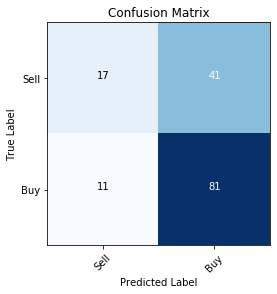

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_labels = ['Sell', 'Buy']
plot_confusion_matrix(cm, cm_labels, title="Confusion Matrix")

In [47]:
MSFT_dates = list(dates[:50])
MSFT_preds = list(y_pred[:50])

AAPL_dates = list(dates[51:100])
AAPL_preds = list(y_pred[51:100])

AMZN_dates = list(dates[100:])
AMZN_preds = list(y_pred[100:])

In [48]:
def pred_to_df(list_of_dates, list_of_preds):
    """takes a list of dates and a list of predictions for the dates and creates a dataframe object"""
    #dict to be transformed into df
    empty_dict = dict()
    for i in range(len(list_of_dates)):
        empty_dict[list_of_dates[i]] = [list_of_preds[i]]
        
    preds_df = pd.DataFrame.from_dict(empty_dict)
    preds_df = preds_df.T
    
    return preds_df

In [49]:
MSFT_df = pred_to_df(MSFT_dates,MSFT_preds)
AAPL_df = pred_to_df(AAPL_dates, AAPL_preds)
AMZN_df = pred_to_df(AMZN_dates, AMZN_preds)




In [50]:
export_predictions  = MSFT_df.to_csv('MSFT_15_19_preds_1d_RandomForest_binary.csv')
export_predictions_two  = AAPL_df.to_csv('AAPL_15_19_preds_1d_RandomForest_binary.csv')
export_predictions_three = AMZN_df.to_csv('AMZN_15_19_preds_1d_RandomForest_binary.csv')